# Goal: Create customer profiles using clustering methods and customer purchase history

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 

import wrangle_profiles as wp

##  Wrangle

The original data contained transaction information for LGS customers from 2001-2004. Items purchased in ‘purchase’ transactions were sorted into one of nine categories. <br>
<br>
Central categories representing major gaming interests include:
* Board Games 
* Role Playing Games
* Trading Card Games
* Tabletop Minis Games
* Modeling_Supplies
<a/>

Support Categories represent categories that support or are adjacent to major interests include:
* Accessories
* Concessions
* Game Room Rentals
<a/>

Items that could not be classified were categorized as 
* Other
<a/>

In [2]:
df = wp.get_prepared_profiles_data()

## Explore 

### What does an average customer's spending habits look like?

In [3]:
cats = ['accessories', 
        'board_games', 
        'concessions', 
        'modeling_supplies',
        'role_playing_games', 
        'minis_models', 
        'trading_card_games', 
        'game_room_rental',
        'net_sales']


df[cats].describe()[1:3]

,accessories,board_games,concessions,modeling_supplies,role_playing_games,minis_models,trading_card_games,game_room_rental,net_sales
mean,1.715006,0.474149,4.362547,1.569987,0.165826,0.541614,2.228247,0.059899,172.634332
std,4.503849,1.391602,18.823379,8.263589,0.877833,2.303441,7.990032,0.564630,442.719224


Given the mean and relatively large standard deviation across all categories, penning down the habbits of an 'average' would be unhelpful due to the large variance. Moving forward it will be my goal to identify population clusters were the variance is less severe.

### How many customers does each category appeal to? 

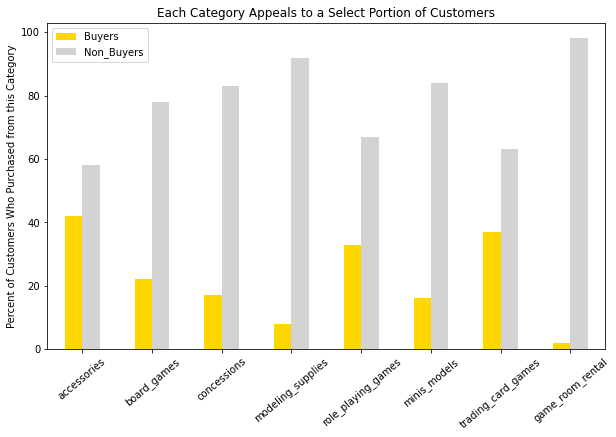

In [4]:
cats = ['accessories', 
        'board_games', 
        'concessions', 
        'modeling_supplies',
        'role_playing_games', 
        'minis_models', 
        'trading_card_games',
        'game_room_rental']

buyers = [round(len(df[df['accessories'] > 0]) / len(df)*100),
          round(len(df[df['board_games'] > 0]) / len(df)*100),
          round(len(df[df['modeling_supplies'] > 0]) / len(df)*100),
          round(len(df[df['role_playing_games'] > 0]) / len(df)*100),
          round(len(df[df['concessions'] > 0]) / len(df)*100),
          round(len(df[df['minis_models'] > 0]) / len(df)*100),
          round(len(df[df['trading_card_games'] > 0]) / len(df)*100),
          round(len(df[df['game_room_rental'] > 0]) / len(df)*100)]
    
non_buyers = [round(len(df[df['accessories'] == 0]) / len(df)*100),
              round(len(df[df['board_games'] == 0]) / len(df)*100),
              round(len(df[df['modeling_supplies'] == 0]) / len(df)*100),
              round(len(df[df['role_playing_games'] == 0]) / len(df)*100),
              round(len(df[df['concessions'] == 0]) / len(df)*100),
              round(len(df[df['minis_models'] == 0]) / len(df)*100),
              round(len(df[df['trading_card_games'] == 0]) / len(df)*100),
              round(len(df[df['game_room_rental'] == 0]) / len(df)*100)]

data = { 'Category':cats,
         'Buyers':buyers,
         'Non_Buyers':non_buyers}

df_data = pd.DataFrame(data)

df_data.set_index('Category', inplace=True)

df_data.plot(kind='bar', figsize=(10, 6), color = ['gold', 'lightgrey'])

plt.xticks(rotation=40)

plt.xlabel('')
plt.ylabel('Percent of Customers Who Purchased from this Category')
plt.title('Each Category Appeals to a Select Portion of Customers')


plt.show()

Each category only appeals to a select amount of customers:
    
Major Categories
* Trading Card Games 37%
* Role Playing Games 33%
* Board Games 22%
* Table Top Minis 16%
* Modeling Supplies 8%

Support Categories
* Accessories 42%
* Concessions 17%
* Game Room Rental 2%

Major categories appeal to roughly 1/3 of customers or less, likely due to specialized interests of customers <br>
Accesories is the highest apeal category likely do to supporting multiple interests tied to major categories

### Is there a relationship between customers who buy products in one category and customers who buy products in a differint category?

In [5]:
cats = ['accessories', 
        'board_games', 
        'concessions',
        'modeling_supplies', 
        'role_playing_games', 
        'minis_models',
        'trading_card_games']

In [6]:
for cat in cats:
    
    df[f'bought_{cat}'] = df[cat] > 0

In [25]:
cats = ['bought_accessories', 
        'bought_board_games', 
        'bought_concessions',
        'bought_modeling_supplies', 
        'bought_role_playing_games', 
        'bought_minis_models',
        'bought_trading_card_games']

combs = combinations(cats, 2)

sigcombs = []


for comb in combs:
    
    cat1 = df[comb[0]]
    cat2 = df[comb[1]]
    
    
    ct = pd.crosstab(cat1, cat2)
    
    chi2, p, dof, expected = chi2_contingency(ct)


    if p < .05:
        
        print(f'{comb[0]} and {comb[1]}')
        print("P-value:", p)
        print()
        
        sigcombs.append(comb)

bought_accessories and bought_concessions
P-value: 0.00022898142106283562

bought_accessories and bought_role_playing_games
P-value: 2.637590995781412e-07

bought_accessories and bought_trading_card_games
P-value: 2.6189298764791124e-09

bought_board_games and bought_role_playing_games
P-value: 0.003992273243111018

bought_board_games and bought_trading_card_games
P-value: 3.903131004282979e-11

bought_concessions and bought_modeling_supplies
P-value: 0.0002876863942808126

bought_concessions and bought_role_playing_games
P-value: 0.0014589471921045644

bought_concessions and bought_minis_models
P-value: 6.77964642111708e-05

bought_concessions and bought_trading_card_games
P-value: 0.00048464442158513405

bought_modeling_supplies and bought_role_playing_games
P-value: 9.432383416725453e-05

bought_modeling_supplies and bought_minis_models
P-value: 5.181101272766629e-53

bought_modeling_supplies and bought_trading_card_games
P-value: 2.005353953456003e-09

bought_role_playing_games and

In [38]:
cat1 = df['bought_trading_card_games']
cat2 = df['bought_board_games']


ct = pd.crosstab(cat1, cat2)

true_true = ct.loc[1, 1]
true_false = ct.loc[0, 1]
false_false = ct.loc[0, 0]
false_true = ct.loc[1, 0]

print(ct)
print()
print(false_false, true_false)
print(false_true, true_true)

bought_board_games         False  True
bought_trading_card_games             
False                        729   272
True                         510    75

729 272
510 75


In [29]:
for comb in sigcombs:
    
    cat1 = df[comb[0]]
    cat2 = df[comb[1]]
    
    
    ct = pd.crosstab(cat1, cat2)
    
    
    
    print(ct)
    print()
    

bought_concessions  False  True
bought_accessories             
False                 646   273
True                  409   258

bought_role_playing_games  False  True
bought_accessories                    
False                        870    49
True                         582    85

bought_trading_card_games  False  True
bought_accessories                    
False                        637   282
True                         364   303

bought_role_playing_games  False  True
bought_board_games                    
False                       1148    91
True                         304    43

bought_trading_card_games  False  True
bought_board_games                    
False                        729   510
True                         272    75

bought_modeling_supplies  False  True
bought_concessions                   
False                       899   156
True                        413   118

bought_role_playing_games  False  True
bought_concessions                    
False       

### Are customers who buy one type of product more or less likely to buy a different type of product?

In [ ]:
for cat_1 in cats:

    df_cata = df[df[cat_1] > 0]

    total = len(df_cata)
    
    print()
    print(f'{total} Customers bought one or more {cat_1.upper()}')

    for cat_2 in cats:

        if cat_1 != cat_2:

            print(f'{round(len(df_cata[df_cata[cat_2] > 0])/total*100)}% also bought one or more {cat_2}')

* Here we can see a significant amount of crossover in customer buying habbits

In [ ]:
cats = ['accessories', 
        'board_games', 
        'concessions',
        'modeling_supplies', 
        'role_playing_games', 
        'minis_models',
        'trading_card_games']

for cat in cats:
    
    correlation, p_value = spearmanr(df[cat], df['net_sales'])
    
    if (correlation >= .2 or correlation < 0) and p_value < .05:

        print()
        print(f'{cat} and net_sales')
        print("Spearman correlation:", correlation)
        print("p-value:", p_value)

In [ ]:
cats = ['accessories', 
        'board_games', 
        'concessions',
        'modeling_supplies', 
        'role_playing_games', 
        'minis_models',
        'trading_card_games']

combs = combinations(cats, 2)

for item in combs:
    
    correlation, p_value = spearmanr(df[item[0]], df[item[1]])
    
    if (correlation >= .2 or correlation < 0) and p_value < .05:

        print()
        print(f'{item[0]} and {item[1]}')
        print("Spearman correlation:", correlation)
        print("p-value:", p_value)
        
        


* There is a noteworthy positive correlation between minis_models and modeling_supplies (.4)
* A weak positive correlation exists between trading_card_games and accessories (.2)
* Trading_card_games is the only category to produce negetive correlations. It is negatively correlated with board_games, minis_models, and modeling_supplies. The correlation is very faint.

In [ ]:
Do clusters formed on customers thay buy products in a given category show different buying habbits?

In [ ]:
Do clusters formed on customers thay buy products in a given category show different buying habbits

In [ ]:
df_acc = df[['accessories', 
                  'board_games', 
                  'concessions', 
                  'modeling_supplies',
                  'role_playing_games', 
                  'minis_models', 
                  'trading_card_games', 
                  'other',
                  'game_room_rental', 
                  'all_items',
                  'net_sales',
                  'tenure']][df.accessories > 0]
df_bg = df[['accessories', 
                  'board_games', 
                  'concessions', 
                  'modeling_supplies',
                  'role_playing_games', 
                  'minis_models', 
                  'trading_card_games', 
                  'other',
                  'game_room_rental', 
                  'all_items',
                  'net_sales'
                  'tenure']][df.board_games > 0]
df_con = df[df.concessions > 0]
df_acc = df[df.modeling_supplies > 0]
df_rpg = df[df.role_playing_games > 0]
df_min = df[['accessories', 
                  'board_games', 
                  'concessions', 
                  'modeling_supplies',
                  'role_playing_games', 
                  'minis_models', 
                  'trading_card_games', 
                  'other',
                  'game_room_rental', 
                  'all_items',
                  'net_sales'
                  'tenure']][df.minis_models > 0]
df_tcg = df[['accessories', 
                  'board_games', 
                  'concessions', 
                  'modeling_supplies',
                  'role_playing_games', 
                  'minis_models', 
                  'trading_card_games', 
                  'other',
                  'game_room_rental', 
                  'all_items',
                  'net_sales']][df.trading_card_games > 0]

In [ ]:
df_bg = df[['accessories', 
                  'board_games', 
                  'concessions', 
                  'modeling_supplies',
                  'role_playing_games', 
                  'minis_models', 
                  'trading_card_games', 
                  'other',
                  'game_room_rental', 
                  'all_items',
                  'net_sales',
                  'tenure']][df.board_games > 0]



df_bg.describe()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

df_bg['cluster'] = kmeans.predict(X)

df_bg.sample(10)

In [ ]:
df_bg.cluster.value_counts()

In [ ]:
# Board Game Clusters

In [ ]:
df_bg[df_bg.cluster == 0].describe()[1:3]

In [ ]:
df_bg[df_bg.cluster == 2].describe()[1:3]

In [ ]:
df_bg[df_bg.cluster == 1].describe()[1:3]

# TCG Clusters

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

df_tcg['cluster'] = kmeans.predict(X)

df_tcg.sample(10)

In [ ]:
df_tcg.cluster.value_counts()

In [ ]:
df_tcg.describe()[1:3]

In [ ]:
df_tcg[df_tcg.cluster == 0].describe()[1:3]

In [ ]:
df_tcg[df_tcg.cluster == 2].describe()[1:3]

In [ ]:
df_tcg[df_tcg.cluster == 1].describe()[1:3]

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

df_bg['cluster'] = kmeans.predict(X)

df_tcg.sample(10)

In [ ]:
X = df_tcg[['net_sales']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:


cols = ['net_sales']

X = df_bg[cols]

model = DBSCAN().fit(X)

df_bg['cluster'] = model.labels_

df_bg.cluster.value_counts()

In [ ]:
df_bg

In [ ]:
df_bg[df_bg.cluster == 0]

In [ ]:
df_bg[df_bg.cluster == 1]

In [ ]:
df_bg[df_bg.cluster == 2]

In [ ]:
df_bg[df_bg.cluster == 3]

In [ ]:
df_cats = df[['accessories', 
                  'board_games', 
                  'concessions', 
                  'modeling_supplies',
                  'role_playing_games', 
                  'minis_models', 
                  'trading_card_games', 
                  'other',
                  'game_room_rental', 
                  'all_items',
                  'net_sales']]

In [ ]:
df_cats

In [ ]:
cols = ['accessories', 
        'board_games', 
        'concessions', 
        'modeling_supplies',
        'role_playing_games', 
        'minis_models', 
        'trading_card_games', 
        'other',
        'game_room_rental', 
        'all_items',
        'net_sales']

for col in cols:
    
    df[cols].hist(col, bins = 50)
    plt.show()
    
    

In [ ]:
df.hist('accessories', bins = 50)

In [ ]:
df[raw_num].describe()

In [ ]:
for col in raw_num:
    
    print()
    print(col.upper())
    print()
    print (f'{round(len(df[df[col] > 0]) / len(df)*100)}% buyers')
    print (f'{round(len(df[df[col] == 0]) / len(df)*100)}% NON-buyers')
    

In [ ]:
df[raw_num]

In [ ]:
df[raw_num][df.trading_card_games > 0].describe()

In [ ]:
df[raw_num][df.accessories > 0].describe()

In [ ]:
df[raw_num][df.concessions > 0].describe()

In [ ]:
df[raw_num][df.modeling_supplies > 0].describe()

In [ ]:
sns.heatmap(df)

In [ ]:
cols = ['accessories', 
        'board_games', 
        'concessions',
        'modeling_supplies', 
        'role_playing_games', 
        'minis_models',
        'trading_card_games',
        'game_room']

for col in cols:
    
    
    print(col, 'Hist')
    
    plt.hist(df[raw_num][df[col] > 0])
    
    plt.show()